# Problem: Reflection unitaries

In the previous two problems, the output of a classical Boolean function is computed into an additional qubit. However, quantum computers can also compute Boolean functions into the phase of a quantum state, which we explore in this problem.

Suppose $f:\{0,1\}^n\rightarrow\{0,1\}$ is a Boolean function. For $\beta \in R$, define an $\textit{n}$-qubit unitary

$$
\large
\begin{equation*}
    U_f(\beta) = \sum_{x\in\{0,1\}^n} e^{i\beta f(x)}|x\rangle \langle x|
\tag{1}
\end{equation*}
$$
When $U_f$ is applied to computational basis state $|x\rangle$ it adds a phase $e^{i\beta}$ if $f(x) = 1$ and does  nothing otherwise.<br>
Your goal in this problem is to implement $U_f$ for a variety of functions with $\textit{n}$= 3
<h3>
\begin{align}
f_0(x_1x_2x_3)&=0,\quad f_1(x_1x_2x_3)=x_1x_2x_3,\quad f_2(x_1x_2x_3)=x_1x_2x_3+(1-x_1)(1-x_2)(1-x_3),\\\nonumber
f_3(x_1x_2x_3)&=x_1+x_2+x_3+x_1x_2x_3,\quad f_4(x_1x_2x_3)=x_1+x_2+x_3.
\tag{2}
\end{align}
</h3>
Here, $f_m$ has m solutions to f(x) = 1. For instance,$f_2$ evaluates to 1 on the inputs x = 000 and x = 111.You may use $A \geq 0$ ancilla qubits in your implementation initialized in $∣0^A\rangle$ as long as they are returned to $∣0^A\rangle$ by the end of the computation. Two examples are shown in Fig.2 for n= 2 functions.

![icpc_reflections.png](icpc_reflections.png "ShowMyImage")

The "reflection unitaries" $U_f(\beta)$ are useful in some quantum algorithms. In particular, the famous Grover search algorithm uses these reflections to outperform classical search algorithms for unstructured lists.

<h1>
    $f_m$ for m = 0

In [1]:

# Importing the qiskit module
from qiskit import *
from qiskit.circuit import Parameter
params = [Parameter('beta')]

q0 =    3 # number of required qubits
a0 =    0 # number of ancilla qubit

# Defining Quantum Circuit with the given circuits
def Circuit_0(q,a):
    if a != 0:
        # initiating required and ancilla qubits
        Q = QuantumRegister(q, 'input') 
        A = QuantumRegister(a)  
        
        # creating circuit with above qubits
        Circ = QuantumCircuit(Q,A)
    else:
        # initiating required qubits
        Q = QuantumRegister(q, 'input') 
        
        # creating circuit with above qubits
        Circ = QuantumCircuit(Q)
    
    ##### Create you circuit below #########
    params = [Parameter('beta')]
    Circ.p(params[0], 0)
    Circ.p(-params[0], 0)

    
    ########################################
    
    # Uncomment to draw quantum circuit
   # display(Circ.draw('mpl'))
    
    # Transpiling the circuit into u, cnot
    Circ = transpile(Circ, basis_gates=['u3','cx'])
    
    # Uncomment to draw transpiled circuit
#     display(Circ.draw('mpl'))
    
    return Circ

qc_0 = Circuit_0(q0,a0)

<h1>
    $f_m$ for m = 1

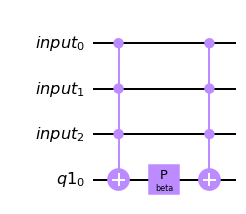

In [2]:
# Importing the qiskit module
from qiskit import *
from qiskit.circuit.library import CU1Gate
from qiskit.circuit.library.standard_gates import XGate
crz = CU1Gate(Parameter('beta'))
c3x_gate = XGate().control(3)
q1 =    3 # number of required qubits
a1 =    1 # number of ancilla qubit

# Defining Quantum Circuit with the given circuits
def Circuit_1(q,a):
    if a != 0:
        # initiating required and ancilla qubits
        Q = QuantumRegister(q, 'input') 
        A = QuantumRegister(a)  
        
        # creating circuit with above qubits
        Circ = QuantumCircuit(Q,A)
    else:
        # initiating required qubits
        Q = QuantumRegister(q, 'input') 
        
        # creating circuit with above qubits
        Circ = QuantumCircuit(Q)
    
    ##### Create you circuit below #########
    Circ.append(c3x_gate,[Q[0],Q[1],Q[2],A[0]])
    Circ.p(params[0], A[0])
    Circ.append(c3x_gate,[Q[0],Q[1],Q[2],A[0]])

    
    ########################################
    
    # Uncomment to draw quantum circuit
    display(Circ.draw('mpl'))
    
    # Transpiling the circuit into u, cnot
    Circ = transpile(Circ, basis_gates=['u3','cx'])
    
    # Uncomment to draw transpiled circuit
#     display(Circ.draw('mpl'))
    
    return Circ

qc_1 = Circuit_1(q1,a1)

<h1>
    $f_m$ for m = 2

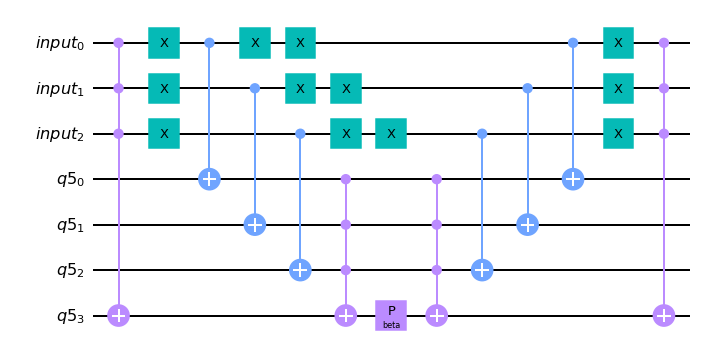

In [3]:
# Importing the qiskit module
from qiskit import *


q2 =    3 # number of required qubits
a2 =  4  # number of ancilla qubit

# Defining Quantum Circuit with the given circuits
def Circuit_2(q,a):
    if a != 0:
        # initiating required and ancilla qubits
        Q = QuantumRegister(q, 'input') 
        A = QuantumRegister(a)  
        
        # creating circuit with above qubits
        Circ = QuantumCircuit(Q,A)
    else:
        # initiating required qubits
        Q = QuantumRegister(q) 
        
        # creating circuit with above qubits
        Circ = QuantumCircuit(Q,A)
    
    ##### Create you circuit below #########
    Circ.append(c3x_gate,[Q[0],Q[1],Q[2],A[3]])
    Circ.x(0)
    Circ.cx(0,A[0])
    Circ.x(0)
    Circ.x(1)
    Circ.cx(1,A[1])
    Circ.x(1)
    Circ.x(2)
    Circ.cx(2,A[2])
    Circ.x(2)
    Circ.append(c3x_gate,[A[0],A[1],A[2],A[3]])
    #Circ.append(crz,[A[3],Q[0]])
    Circ.p(params[0], A[3])
    #Circ.append(crz,[A[3],Q[1]])
    #Circ.append(crz,[A[3],Q[2]])
    Circ.append(c3x_gate,[A[0],A[1],A[2],A[3]])
    Circ.x(2)
    Circ.cx(2,A[2])
    Circ.x(2)
    Circ.x(1)
    Circ.cx(1,A[1])
    Circ.x(1)
    Circ.x(0)
    Circ.cx(0,A[0])
    Circ.x(0)
    Circ.append(c3x_gate,[Q[0],Q[1],Q[2],A[3]])

    
    ########################################
    
    # Uncomment to draw quantum circuit
    display(Circ.draw('mpl'))
    
    # Transpiling the circuit into u, cnot
    Circ = transpile(Circ, basis_gates=['u3','cx'])
    
    # Uncomment to draw transpiled circuit
#     display(Circ.draw('mpl'))
    
    return Circ

qc_2 = Circuit_2(q2,a2)

<h1>
    $f_m$ for m = 3

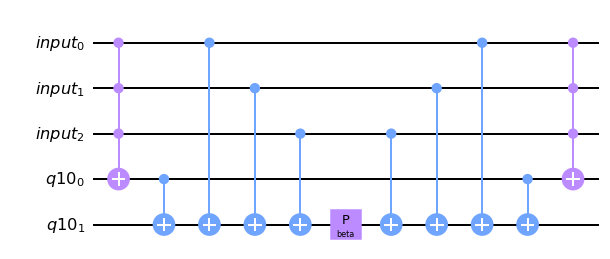

In [4]:
# Importing the qiskit module
from qiskit import *


q3 =   3  # number of required qubits
a3 =   2 # number of ancilla qubit

# Defining Quantum Circuit with the given circuits
def Circuit_3(q,a):
    if a != 0:
        # initiating required and ancilla qubits
        Q = QuantumRegister(q, 'input') 
        A = QuantumRegister(a)  
        
        # creating circuit with above qubits
        Circ = QuantumCircuit(Q,A)
    else:
        # initiating required qubits
        Q = QuantumRegister(q) 
        
        # creating circuit with above qubits
        Circ = QuantumCircuit(Q,A)
    
    ##### Create you circuit below #########
    Circ.append(c3x_gate,[0,1,2,A[0]])
    Circ.cx(A[0],A[1])
    Circ.cx(0,A[1])
    Circ.cx(1,A[1])
    Circ.cx(2,A[1])
    #Circ.append(crz,[A[1],Q[2]])
    Circ.p(params[0], A[1])
    #Circ.append(crz,[A[1],Q[1]])
    #Circ.append(crz,[A[1],Q[2]])
    Circ.cx(2,A[1])
    Circ.cx(1,A[1])
    Circ.cx(0,A[1])
    Circ.cx(A[0],A[1])
    Circ.append(c3x_gate,[0,1,2,A[0]])

    
    ########################################
    
    # Uncomment to draw quantum circuit
    display(Circ.draw('mpl'))
    
    # Transpiling the circuit into u, cnot
    Circ = transpile(Circ, basis_gates=['u3','cx'])
    
    # Uncomment to draw transpiled circuit
#     display(Circ.draw('mpl'))
    
    return Circ

qc_3 = Circuit_3(q3,a3)

<h1>
    $f_m$ for m = 4

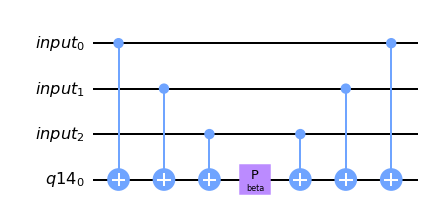

In [5]:
# Importing the qiskit module
from qiskit import *


q4 =   3  # number of required qubits
a4 =  1  # number of ancilla qubit

# Defining Quantum Circuit with the given circuits
def Circuit_4(q,a):
    if a != 0:
        # initiating required and ancilla qubits
        Q = QuantumRegister(q, 'input') 
        A = QuantumRegister(a)  
        
        # creating circuit with above qubits
        Circ = QuantumCircuit(Q,A)
    else:
        # initiating required qubits
        Q = QuantumRegister(q) 
        
        # creating circuit with above qubits
        Circ = QuantumCircuit(Q,A)
    
    ##### Create you circuit below #########
    Circ.cx(0,A[0])
    Circ.cx(1,A[0])
    Circ.cx(2,A[0])
    #Circ.append(crz,[A[0],Q[0]])
    Circ.p(params[0], A[0])
    #Circ.append(crz,[A[0],Q[1]])
    #Circ.append(crz,[A[0],Q[2]])
    Circ.cx(2,A[0])
    Circ.cx(1,A[0])
    Circ.cx(0,A[0])
    
    

    
    ########################################
    
    # Uncomment to draw quantum circuit
    display(Circ.draw('mpl'))
    
    # Transpiling the circuit into u, cnot
    Circ = transpile(Circ, basis_gates=['u3','cx'])
    
    # Uncomment to draw transpiled circuit
#     display(Circ.draw('mpl'))
    
    return Circ

qc_4 = Circuit_4(q4,a4)

### Grader

In [6]:
all_circuits = [qc_0, qc_1, qc_2, qc_3, qc_4]
from qc_grader import grade_ex3
import time
start_time = time.time()
grade_ex3(all_circuits)
print("--- %s seconds ---" % (time.time() - start_time))

Checking for circuit 0 ...
Checking for circuit 1 ...
Checking for circuit 2 ...
Checking for circuit 3 ...
Checking for circuit 4 ...
Grading your answer for ex3. Please wait...

Congratulations 🎉! Your answer is correct.
Your cost is 2632.
Feel free to submit your answer.

--- 13.577566385269165 seconds ---


# Circuit verification and Cost Metric

$\textbf{Costing metric:}$ For the $m^{th}$ circuit, let $G_m$ be the number of 2-qubit gates, $D_m$ the depth,  and $A_m$ the number of ancillas. Your solution quality will be judged on the following cost metric: 
$$\text{Cost} = \sum_{m=0}^4 10G_m + D_m(n+A_m)$$ .
The reasoning behind this metric relates to the error rates in quantum circuits. Notice that $D_m(n+A_m)$ is roughly the spacetime volume of the circuit (the collective number of timesteps qubits participating in thecircuit must be kept alive). Also, two-qubit gates are roughly (optimistically) 10 times as likely to fail as idling qubits. Thus, $Cost_n$ is roughly proportional to error rate of all of your circuits combined.

### Submission for evaluation 

In [7]:
## Uncomment and run the following code to submit
#from qc_grader import submit_ex3

#submit_ex3(all_circuits)